# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html). 

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [28]:
#Importing the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker
from sklearn import datasets, manifold
%pip install torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
%pip install umap
import umap

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Loading the dataset
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


In [5]:
#After Loading the data, lets convert the images into image and labels
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for i in range(len(dataset)):
        image, label = dataset[i]
        images.append(image.numpy().reshape(-1))  # Reshape from 3D to 1D
        labels.append(label)
    return np.array(images), np.array(labels)

# Convert training and test datasets so we can use them later for manifold learning.
train_images, train_labels = dataset_to_numpy(dataset)
test_images, test_labels = dataset_to_numpy(test_dataset)

In [6]:
# Display shapes
print(f'Training images shape: {train_images.shape}') 
print(f'Training labels shape: {train_labels.shape}') 
print(f'Test images shape: {test_images.shape}')       
print(f'Test labels shape: {test_labels.shape}')    

Training images shape: (50000, 3072)
Training labels shape: (50000,)
Test images shape: (10000, 3072)
Test labels shape: (10000,)


In [13]:
#Let's create a subset of the first 1500 image and labels since the kernel will not handle a large dataset of 50,000
subset_images = train_images[:1000]
subset_labels = train_labels[:1000]

Manifold Learning Algorithms

In [20]:
def plot_embedding(X, labels, title):
    # Create a Pandas DataFrame for Seaborn
    import pandas as pd
    df = pd.DataFrame({
        'Component 1': X[:, 0],
        'Component 2': X[:, 1],
        'Label': labels
    })

    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Component 1', y='Component 2', hue='Label', palette='tab10', data=df, s=50, alpha=0.6, edgecolor='w')
    plt.title(title)
    plt.grid(True)
    plt.show()


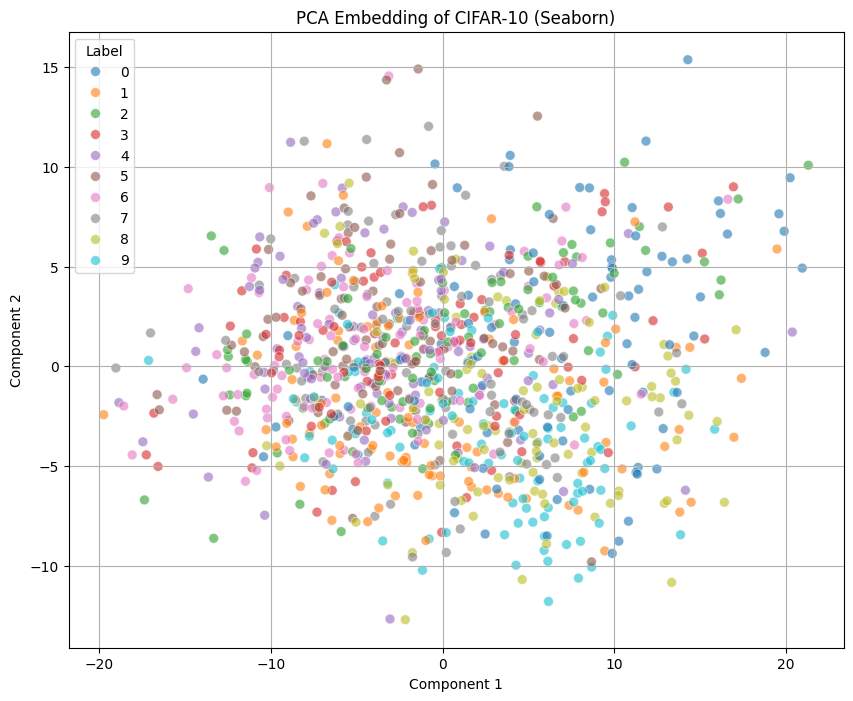

In [21]:
#PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(subset_images)

plot_embedding(X_pca, subset_labels, 'PCA Embedding of CIFAR-10 (Seaborn)')

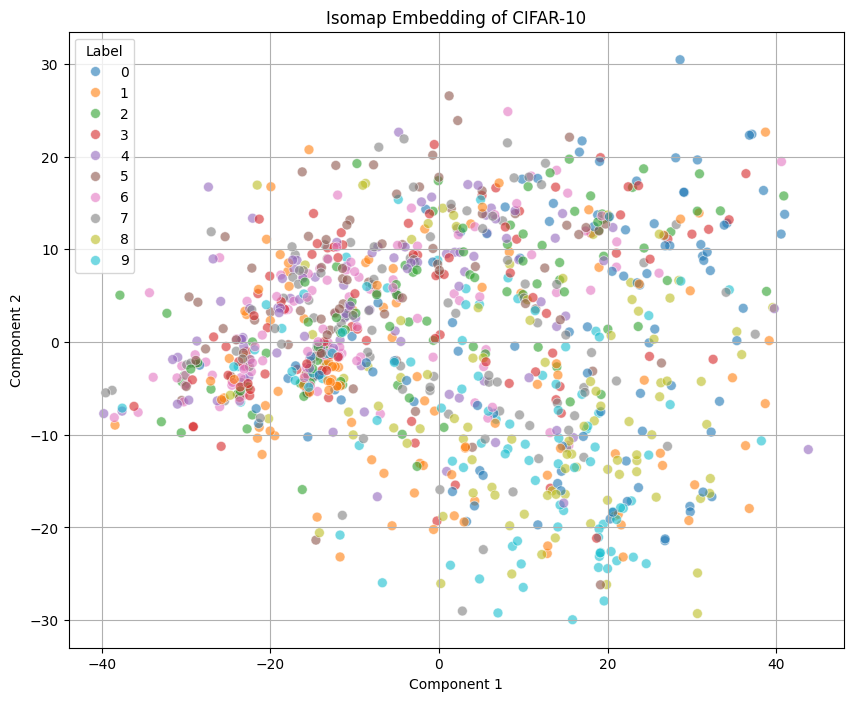

In [22]:
#Isomap Embedding

isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(subset_images)
plot_embedding(X_isomap, subset_labels, 'Isomap Embedding of CIFAR-10')

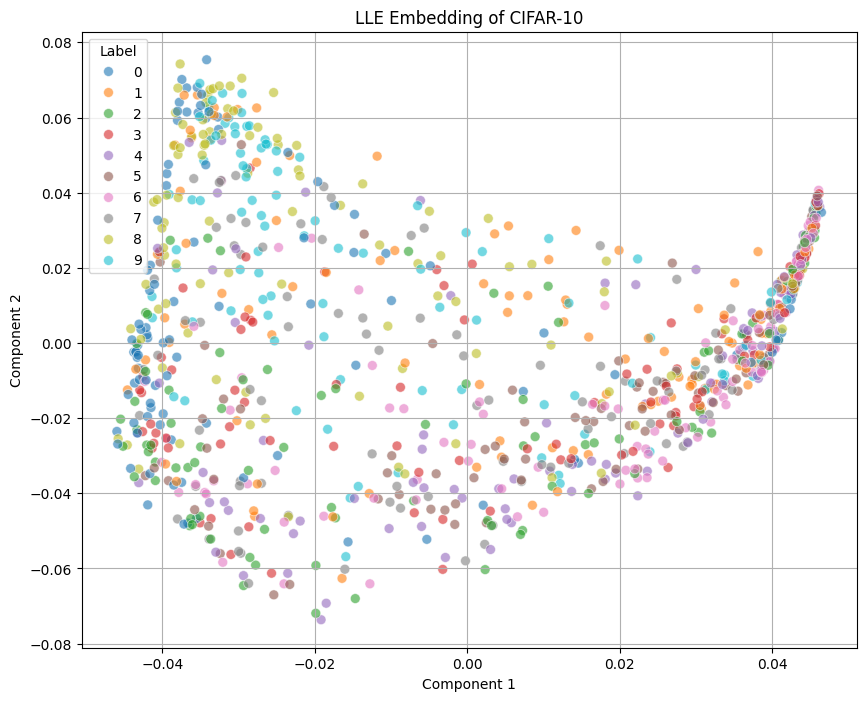

In [23]:
## Locally Linear Embedding(LLE)

lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(subset_images)
plot_embedding(X_lle, subset_labels, 'LLE Embedding of CIFAR-10')

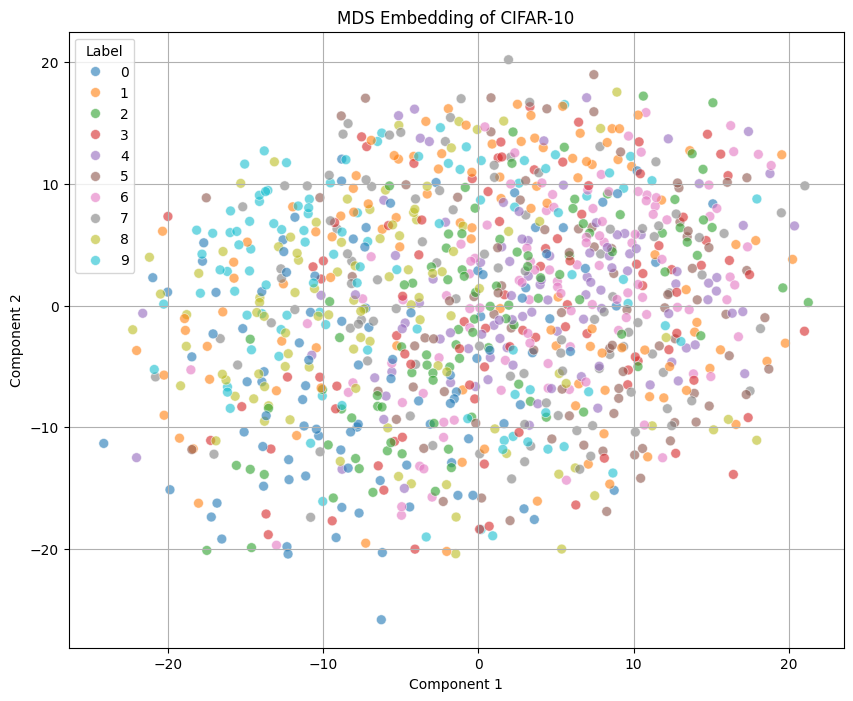

In [24]:
# Multidimensional Scaling(MDS)
mds = MDS(n_components=2)
X_mds = mds.fit_transform(subset_images)
plot_embedding(X_mds, subset_labels, 'MDS Embedding of CIFAR-10')

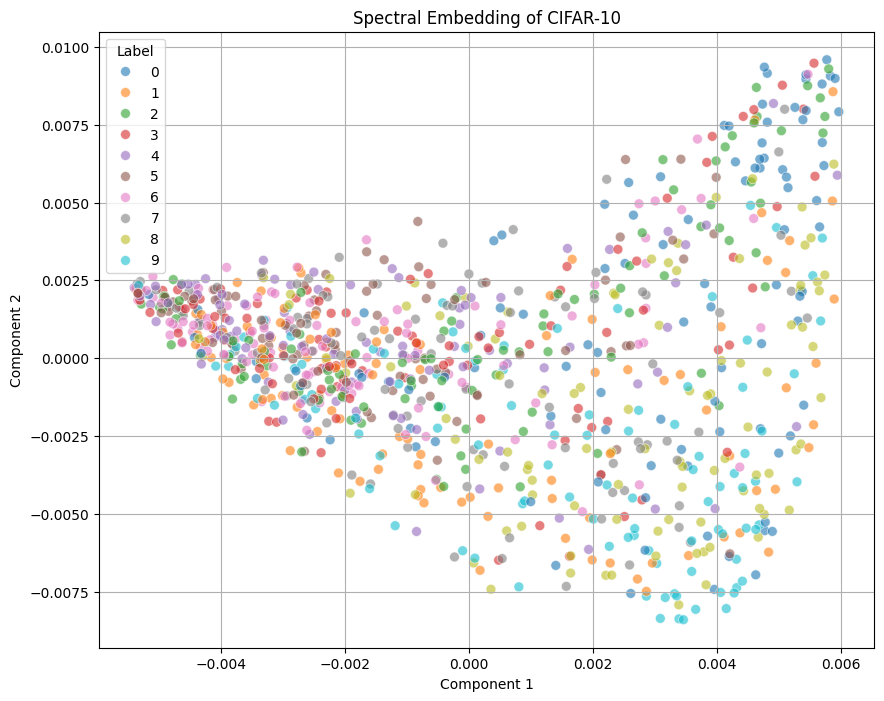

In [25]:
# Spectral Embedding

spectral = SpectralEmbedding(n_components=2)
X_spectral = spectral.fit_transform(subset_images)
plot_embedding(X_spectral, subset_labels, 'Spectral Embedding of CIFAR-10')

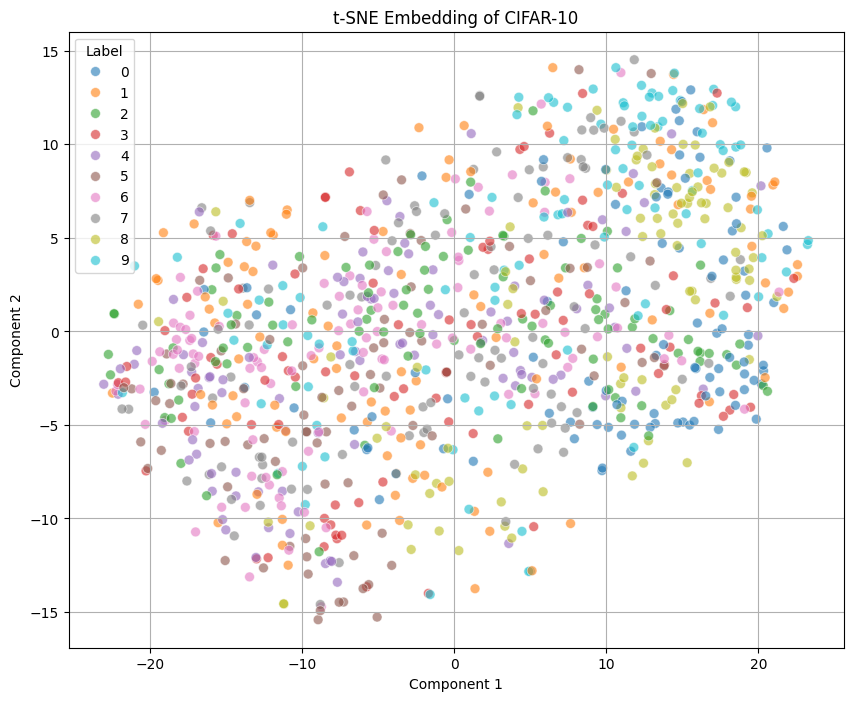

In [26]:
# T-distributed Stochastic Neighbor Embedding(t-SNE)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(subset_images)
plot_embedding(X_tsne, subset_labels, 't-SNE Embedding of CIFAR-10')

In [30]:
# Uniform Manifold Approximation an Projection (UMAP)

umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(subset_images)
plot_embedding(X_umap, subset_labels, 'UMAP Embedding of CIFAR-10')

AttributeError: module 'umap' has no attribute 'UMAP'